In [2]:
def loadfile(fname):
    import pickle
    with open(fname, 'rb') as handle:
        A = pickle.load(handle)
    return A

In [3]:
cb={}
cb=loadfile('cosblack2.pickle')
wb={}
wb=loadfile('whiteblack2.pickle')
cw={}
cw=loadfile('coswhite2.pickle')
ww={}
ww=loadfile('whitewhite2.pickle')

tcb=[]
twb=[]
tcw=[]
tww=[]
for k in xrange(1,498):
    tcb.append(cb[k]['temp'])
    twb.append(wb[k]['temp'])
    tcw.append(cw[k]['temp'])
    tww.append(ww[k]['temp'])

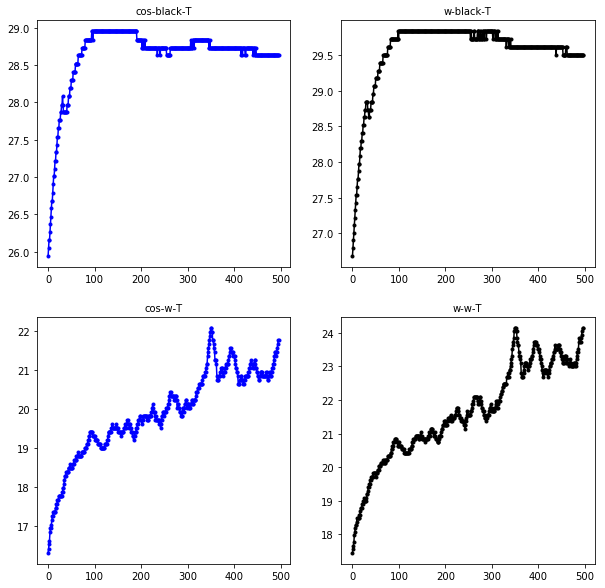

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline
fig, ((ax,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 10))
ax.set_title('cos-black-T', fontsize=10)
ax2.set_title('w-black-T', fontsize=10)
ax3.set_title('cos-w-T', fontsize=10)
ax4.set_title('w-w-T', fontsize=10)
ax.plot(tcb,'.-',color='blue')
ax2.plot(twb,'.-',color='black')
ax3.plot(tcw,'.-',color='blue')
ax4.plot(tww,'.-',color='black')

In [5]:
def inter(y,a,b):
    from scipy.interpolate import interp1d
    
    #x = np.linspace(0, 10, num=11, endpoint=True)
    x=np.linspace(0,len(y),num=len(y))
    print len(x),len(y)
    f = interp1d(x, y)
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(0, len(y), num=5000)#, endpoint=False)
    #plt.plot(x,y,'x')
    #plt.plot(xnew,f(xnew),'-')
    #plt.plot(xnew,f2(xnew),'-')
    #print len(x)
    #print len(xnew)
    #print(f(xnew))
    #retur

In [6]:
inter(tcw,0,0)

497 497


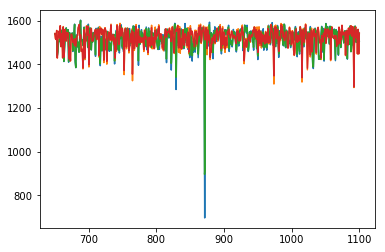

In [7]:
wbref=[]
wbref=wb[3]['data']
wbref=[float(k) for k in wbref];
cbref=[]
cbref=cb[3]['data']
cbref=[float(k) for k in cbref];
wwref=[]
wwref=ww[50]['data']
wwref=[float(k) for k in wwref];
#print wwref
cwref=[]
cwref=cw[50]['data']
cwref=[float(k) for k in cwref];
#plt.plot(wbref)
#plt.plot(cbref)

###############################
#NIR RANGE 650-1100 nm
wlen=np.linspace(650,1100,num=len(wwref))
iwlen=np.linspace(650,1100,num=2*len(wwref))
#print len(wwref)
#print len(wlen)



plt.plot(wlen,wbref)
plt.plot(wlen,cbref)


fwbref= interp1d(wlen, wbref)
fwcbref= interp1d(wlen, cbref)
fwb=fwbref(iwlen)
fcb=fwcbref(iwlen)

plt.plot(iwlen,fwb)
plt.plot(iwlen,fcb)

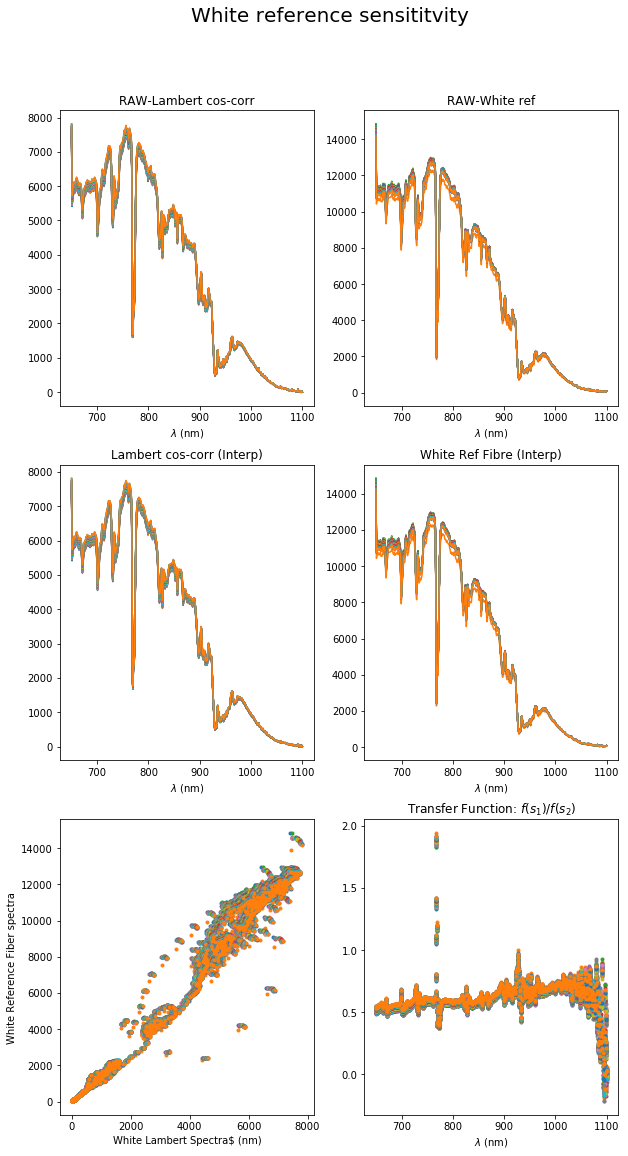

In [78]:
fig, ((ax,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(10, 18))
fig.suptitle('White reference sensititvity',fontsize=20)
plt.subplots_adjust(top=0.9)
ax.set_title("RAW-Lambert cos-corr")
ax.set_xlabel("$\lambda$ (nm)")
ax2.set_title("RAW-White ref")
ax2.set_xlabel("$\lambda$ (nm)")
ax3.set_title("Lambert cos-corr (Interp)")
ax4.set_title("White Ref Fibre (Interp)")
ax3.set_xlabel("$\lambda$ (nm)")
ax4.set_xlabel("$\lambda$ (nm)")

ax5.set_xlabel("White Lambert Spectra$ (nm)")
ax5.set_ylabel("White Reference Fiber spectra")

ax6.set_title("Transfer Function: $f(s_1)/f(s_2)$") 
#$ \frac{f(s_1)}{f(s_2)}$")
ax6.set_xlabel("$\lambda$ (nm)")

for j in range(66,100):
    if j not in [66,67]:
        
        
        ###################################
        #spec[j]=[float(k) for k in spec[j]];
        #ref[j]=[float(k) for k in ref[j]];
        q1=[float(i)-float(jn) for i,jn in zip(cw[j]['data'],cbref)]
        q2=[float(i)-float(jn) for i,jn in zip(ww[j]['data'],wbref)]
        #s1=[i-k for i,k in zip(spec[j],cbref)]
        #s2=[i-k for i,k in zip(ref[j],wbref)]
    
        fa=[]
        fb=[]
        fcit= interp1d(wlen,q1)  #target
        fwit= interp1d(wlen, q2) #white
        fa=fcit(iwlen)
        fb=fwit(iwlen)
        
        mn1=abs(min(fa))+1e-5
        mn2=abs(min(fb))+1e-5
        
        s1=[i+mn1 for i in fa]
        s2=[i+mn2 for i in fb]
        
        ax3.plot(iwlen,fa)
        ax4.plot(iwlen,fb)
        ####################################
        
        ax5.plot(fa,fb,'.')#[j+1]['data'],ww[j]['data'],".")
       
        qu=[x/y for x,y in zip(fa,fb)]
    
        ax.plot(wlen,q1)
        ax2.plot(wlen,q2)
        ax6.plot(iwlen,qu,'.')
        
        #print len(cw[j+1]['data']), len(ww[j]['data'])
gamma=[x/y for x,y,in zip(fwb,fcb)]
#print gamma
plt.savefig('wvwplts.png',bbox_inches='tight',transparent=True,pad_inches=0)

# FLYTRAP

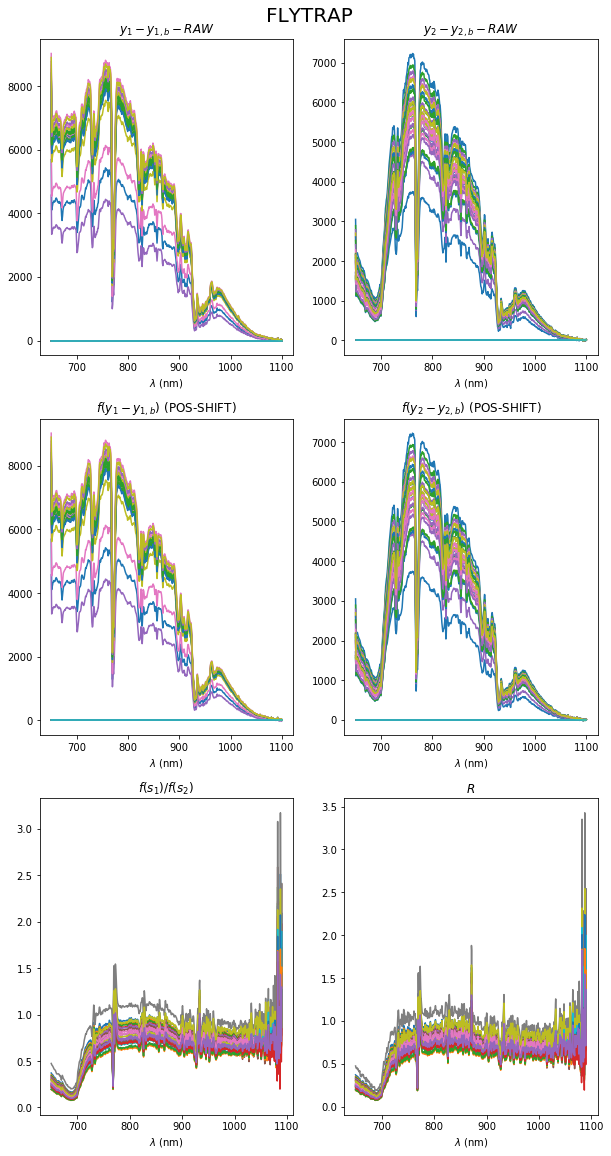

In [40]:
spec={}
ref={}
for j in range(175,200):
    spec[j]=cw[j]['data']
    ref[j]=ww[j]['data']
    #print len(spec[j])
R={}
R2={}
    
fig, ((ax,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(10, 18))
fig.suptitle('FLYTRAP',fontsize=20)
plt.subplots_adjust(top=0.955)
ax.set_title("$y_1-y_{1,b}-RAW$")
ax2.set_title("$y_2-y_{2,b}-RAW$")
ax3.set_title("$f(y_1-y_{1,b})$ (POS-SHIFT)")
ax4.set_title("$f(y_2-y_{2,b})$ (POS-SHIFT)")
ax5.set_title("$f(s_1)/f(s_2)$")
ax6.set_title("$R$")
ldlabel="$\lambda$ (nm)"
ax.set_xlabel(ldlabel)
ax2.set_xlabel(ldlabel)
ax3.set_xlabel(ldlabel)
ax4.set_xlabel(ldlabel)
ax5.set_xlabel(ldlabel)
ax6.set_xlabel(ldlabel)


zer=range(0,511)
zer=[0.0*j for k in zer]
for j in spec.keys():
    spec[j]=[float(k) for k in spec[j]];
    ref[j]=[float(k) for k in ref[j]];
    
    s1=[i-k for i,k in zip(spec[j],cbref)]
    s2=[i-k for i,k in zip(ref[j],wbref)]
    
    #############################
    fa=[]
    fb=[]
    fcit= interp1d(wlen,s1)  #target
    fwit= interp1d(wlen, s2) #white
    fa=fcit(iwlen)
    fb=fwit(iwlen)
    mn1=abs(min(fa))+1e-5
    mn2=abs(min(fb))+1e-5
    #avdx=[float(x+mn1)/float((y+mn2)) for x,y in zip(fb,fa)]
    #############################  
    ax.plot(wlen,s1)
    ax.plot(wlen,zer)
    ax2.plot(wlen,s2)
    ax2.plot(wlen,zer)
    ax3.plot(iwlen,fa)
    ax3.plot(wlen,zer)
    ax4.plot(iwlen,fb)
    ax4.plot(wlen,zer)
    
    R2[j]=[(x+mn2)/(y+mn1) for x,y in zip(fb,fa)]
    R[j]=[x/y for x,y in zip(R2[j],gamma)]
    ax5.plot(iwlen[0:1000],R2[j][0:1000])
    ax6.plot(iwlen[0:1000],R[j][0:1000])
    #s3=[x/y for x,y in zip(s1,s2)]
    #ax3.plot(s3)
    #s4=[x/y for x,y in zip(s2,wwref)]
    #print s4
    #raw_input()
    #R[j]=[x/y for x,y in zip(s3,s4)]
    #raw_input()
    #plt.plot(R[j]) 
plt.savefig('flytrap.png',bbox_inches='tight',transparent=True,pad_inches=0)

# PLANT B

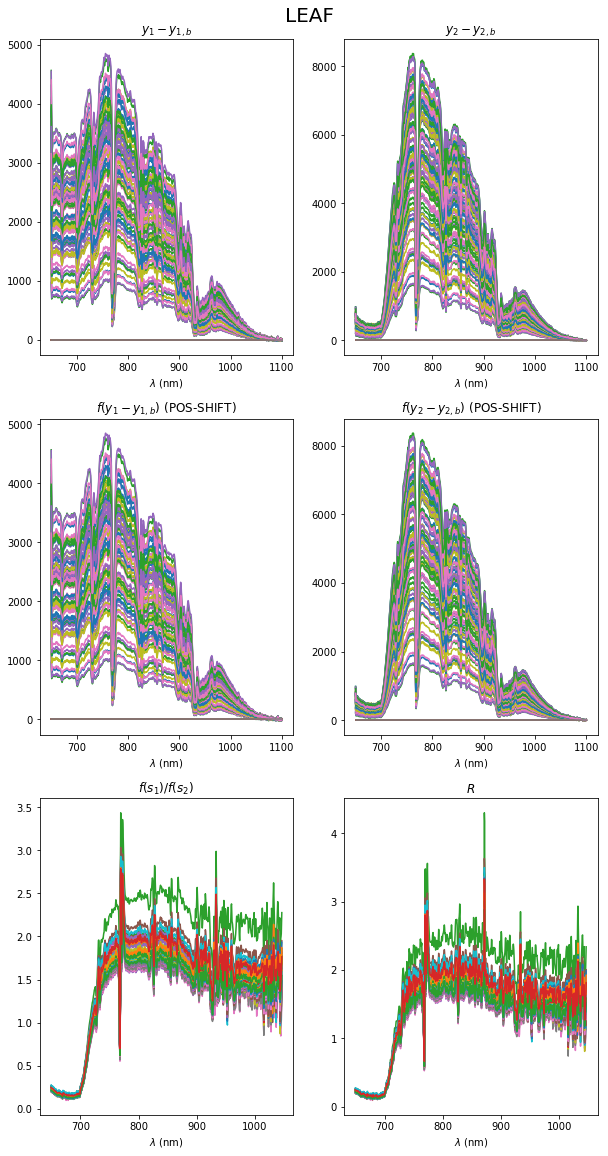

In [41]:
spec={}
ref={}
for j in range(316,400):
    spec[j]=cw[j]['data']
    ref[j]=ww[j]['data']
R={}
for j in spec.keys():
    spec[j]=[float(k) for k in spec[j]];
    ref[j]=[float(k) for k in ref[j]];
    s1=[i-0.0 for i,k in zip(spec[j],cbref)]
    s2=[i-0.0 for i,k in zip(ref[j],wbref)]
    s3=[x/y for x,y in zip(s1,cwref)]
    s4=[x/y for x,y in zip(s2,wwref)]
    #print s4
    #raw_input()
    R[j]=[x/y for x,y in zip(s3,s4)]
    #raw_input(
    #plt.plot(R[j])
    
fig, ((ax,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(10, 18))
plt.subplots_adjust(top=0.955)

zer=range(0,511)
zer=[0.0*j for k in zer]

fig.suptitle('LEAF',fontsize=20)

ax.set_title("$y_1-y_{1,b}$")
ax2.set_title("$y_2-y_{2,b}$")
ax3.set_title("$f(y_1-y_{1,b})$ (POS-SHIFT)")
ax4.set_title("$f(y_2-y_{2,b})$ (POS-SHIFT)")
ax5.set_title("$f(s_1)/f(s_2)$")
ax6.set_title("$R$")

ldlabel="$\lambda$ (nm)"
ax.set_xlabel(ldlabel)
ax2.set_xlabel(ldlabel)
ax3.set_xlabel(ldlabel)
ax4.set_xlabel(ldlabel)
ax5.set_xlabel(ldlabel)
ax6.set_xlabel(ldlabel)

###############
zer=range(0,511)
zer=[0.0*j for k in zer]
for j in spec.keys():
    spec[j]=[float(k) for k in spec[j]];
    ref[j]=[float(k) for k in ref[j]];
    
    s1=[i-k for i,k in zip(spec[j],cbref)]
    s2=[i-k for i,k in zip(ref[j],wbref)]
    
    #############################
    fa=[]
    fb=[]
    fcit= interp1d(wlen,s1)  #target
    fwit= interp1d(wlen, s2) #white
    fa=fcit(iwlen)
    fb=fwit(iwlen)
    mn1=abs(min(fa))+1e-5
    mn2=abs(min(fb))+1e-5
    #avdx=[float(x+mn1)/float((y+mn2)) for x,y in zip(fb,fa)]
    #############################  
    ax.plot(wlen,s1)
    ax.plot(wlen,zer)
    ax2.plot(wlen,s2)
    ax2.plot(wlen,zer)
    ax3.plot(iwlen,fa)
    ax3.plot(wlen,zer)
    ax4.plot(iwlen,fb)
    ax4.plot(wlen,zer)
    
    R2[j]=[(x+mn2)/(y+mn1) for x,y in zip(fb,fa)]
    R[j]=[x/y for x,y in zip(R2[j],gamma)]
    ax5.plot(iwlen[0:900],R2[j][0:900])
    ax6.plot(iwlen[0:900],R[j][0:900])
    
plt.savefig('leaf.png',bbox_inches='tight',transparent=True,pad_inches=0)

# GRASS

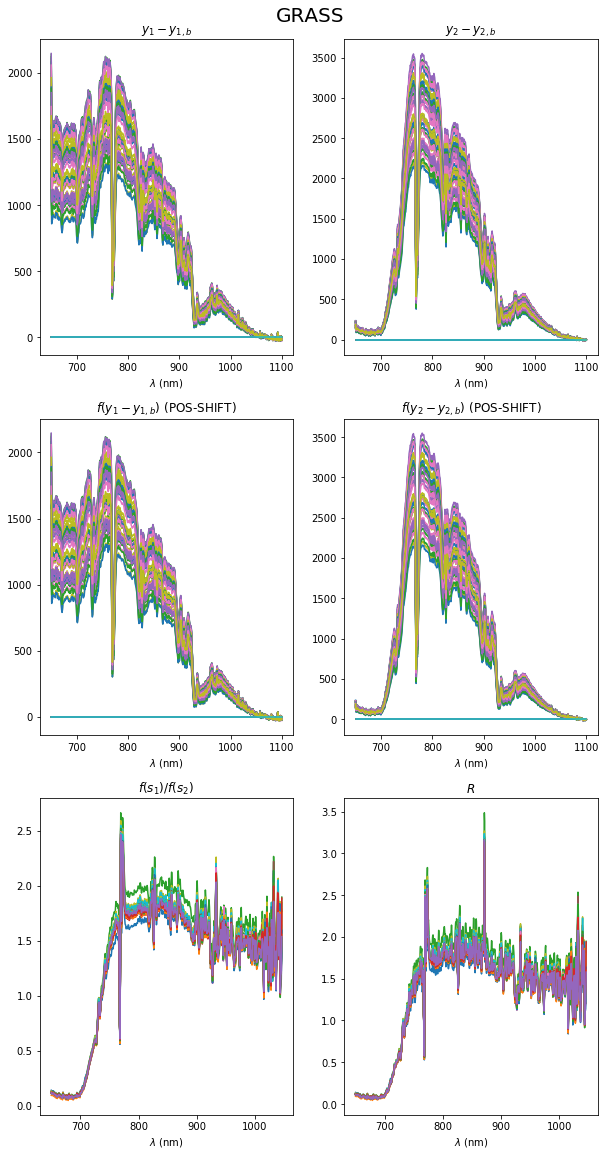

In [42]:
spec={}
ref={}
for j in range(425,470):
    spec[j]=cw[j]['data']
    ref[j]=ww[j]['data']
R={}
#for j in spec.keys():
#    spec[j]=[float(k) for k in spec[j]];
#    ref[j]=[float(k) for k in ref[j]];
#    s1=[i-0.0 for i,k in zip(spec[j],cbref)]
#    s2=[i-0.0 for i,k in zip(ref[j],wbref)]
#    s3=[x/y for x,y in zip(s1,cwref)]
#    s4=[x/y for x,y in zip(s2,wwref)]
    #print s4
    #raw_input()
#    R[j]=[x/y for x,y in zip(s3,s4)]
    #raw_input(
#    plt.plot(R[j])

##############
zer=range(0,511)
zer=[0.0*j for k in zer]
fig, ((ax,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(10, 18))
plt.subplots_adjust(top=0.955)
fig.suptitle('GRASS',fontsize=20)
ax.set_title("$y_1-y_{1,b}$")
ax2.set_title("$y_2-y_{2,b}$")
ax3.set_title("$f(y_1-y_{1,b})$ (POS-SHIFT)")
ax4.set_title("$f(y_2-y_{2,b})$ (POS-SHIFT)")
ax5.set_title("$f(s_1)/f(s_2)$")
ax6.set_title("$R$")

ldlabel="$\lambda$ (nm)"
ax.set_xlabel(ldlabel)
ax2.set_xlabel(ldlabel)
ax3.set_xlabel(ldlabel)
ax4.set_xlabel(ldlabel)
ax5.set_xlabel(ldlabel)
ax6.set_xlabel(ldlabel)
##############
zer=range(0,511)
zer=[0.0*j for k in zer]
for j in spec.keys():
    spec[j]=[float(k) for k in spec[j]];
    ref[j]=[float(k) for k in ref[j]];
    
    s1=[i-k for i,k in zip(spec[j],cbref)]
    s2=[i-k for i,k in zip(ref[j],wbref)]
    
    #############################
    fa=[]
    fb=[]
    fcit= interp1d(wlen,s1)  #target
    fwit= interp1d(wlen, s2) #white
    fa=fcit(iwlen)
    fb=fwit(iwlen)
    mn1=abs(min(fa))+1e-5
    mn2=abs(min(fb))+1e-5
    #avdx=[float(x+mn1)/float((y+mn2)) for x,y in zip(fb,fa)]
    #############################  
    ax.plot(wlen,s1)
    ax.plot(wlen,zer)
    ax2.plot(wlen,s2)
    ax2.plot(wlen,zer)
    ax3.plot(iwlen,fa)
    ax3.plot(wlen,zer)
    ax4.plot(iwlen,fb)
    ax4.plot(wlen,zer)
    
    R2[j]=[(x+mn2)/(y+mn1) for x,y in zip(fb,fa)]
    R[j]=[x/y for x,y in zip(R2[j],gamma)]
    ax5.plot(iwlen[0:900],R2[j][0:900])
    ax6.plot(iwlen[0:900],R[j][0:900])

##############    
plt.savefig('grass.png',bbox_inches='tight',transparent=True,pad_inches=0)